#### Objective : 
The objective of this casestudy is to offer a brief introduction to how Pandas can be utilized for data analysis. The dataset that we are going to use is called the Major League Baseball (MLB) Salaries dataset.

#### Data Source : https://docs.google.com/spreadsheets/d/1mp0Re_FBgIKWBQCDgFN4DocWp324sUYjrIZX6N1WlK0/edit#gid=54876633

#### 1) Importing the relevant Libraries :

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


#### 2) Loading the Dataset :

In [2]:
#loading the dataset
mlb_salaries=pd.read_csv('mlbsalaries.csv')
mlb_salaries.head()

,Year,Player,Salary,Position,Team
0,1988,Mike Witt,1400000,Pitcher,Los Angeles Angels
1,1988,George Hendrick,989333,Outfielder,Los Angeles Angels
2,1988,Chili Davis,950000,Outfielder,Los Angeles Angels
3,1988,Brian Downing,900000,Designated Hitter,Los Angeles Angels
4,1988,Bob Boone,883000,Catcher,Los Angeles Angels


#### 3) For each year, for each team, for each position, display  a dataframe containing the highest paid players  :

In [3]:
dataframe_highest=pd.DataFrame()
grouped_year=mlb_salaries.groupby('Year')
for year,year_df in grouped_year:
    grouped_position=year_df.groupby('Position')
    for position,position_df in grouped_position:
        grouped_team=position_df.groupby('Team')
        for team,df_team in grouped_team:
            top_salaries=df_team.sort_values(ascending=False,by=['Salary']).iloc[0,:]
            dataframe_highest=dataframe_highest.append(top_salaries)
dataframe_highest.head()

,Player,Position,Salary,Team,Year
106,Ozzie Virgil,Catcher,900000.0,Atlanta Braves,1988.0
375,Terry Kennedy,Catcher,850000.0,Baltimore Orioles,1988.0
533,Rich Gedman,Catcher,952727.0,Boston Red Sox,1988.0
186,Jody Davis,Catcher,1108333.0,Chicago Cubs,1988.0
633,Carlton Fisk,Catcher,700000.0,Chicago White Sox,1988.0


#### 3.1) On Basis of the above dataframe find the highest played catchers for Los Angeles Angels for each year and plot their salaries :

In [4]:
#extracting the highest paid catchers of Los Angeles Angels :
df_catcher=dataframe_highest[(dataframe_highest['Position']=='Catcher')&(dataframe_highest['Team']=='Los Angeles Angels')]
df_catcher.head()

,Player,Position,Salary,Team,Year
4,Bob Boone,Catcher,883000.0,Los Angeles Angels,1988.0
690,Lance Parrish,Catcher,1000000.0,Los Angeles Angels,1989.0
1396,Lance Parrish,Catcher,1916667.0,Los Angeles Angels,1990.0
2372,Lance Parrish,Catcher,2416667.0,Los Angeles Angels,1991.0
3092,Lance Parrish,Catcher,2416667.0,Los Angeles Angels,1992.0


Text(0.5,1,'Variation of Highest Salary with Year')

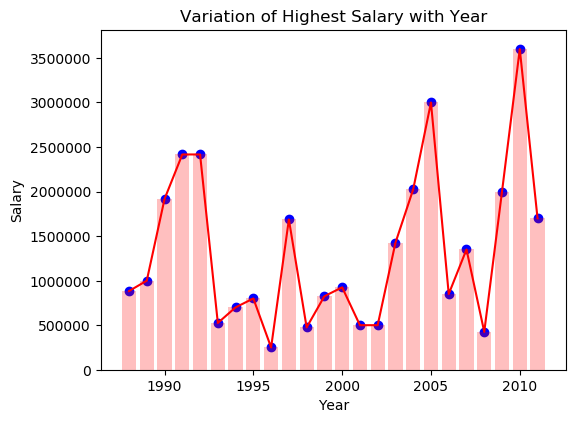

In [5]:
#plotting the variation of salaries :
fig,ax=plt.subplots(nrows=1,ncols=1,figsize=(6,4.5),dpi=100)
ax.plot(df_catcher['Year'],df_catcher['Salary'],color='red')
ax.scatter(df_catcher['Year'],df_catcher['Salary'],color='blue')
ax.bar(df_catcher['Year'],df_catcher['Salary'],color='red',alpha=0.25)
ax.set_xlabel('Year')
ax.set_ylabel('Salary')
ax.set_title('Variation of Highest Salary with Year')

#### 4) From the given dataframe extract a dataframe containing the maximum salary paid to pitchers for the year 2010 by each team:

In [6]:
top_pitcher_salaries_2010=pd.DataFrame()
yr2010=mlb_salaries[(mlb_salaries['Year']==2010) & (mlb_salaries['Position']=='Pitcher')]
team_2010_grouped=yr2010.groupby('Team')
for team,df_team in team_2010_grouped:
    top_salaries=df_team.sort_values(by='Salary',ascending='False').iloc[0,:]
    top_pitcher_salaries_2010=top_pitcher_salaries_2010.append(top_salaries)
top_pitcher_salaries_2010.head(10)

,Player,Position,Salary,Team,Year
18123,Jordan Norberto,Pitcher,400000.0,Arizona Diamondbacks,2010.0
18012,Kris Medlen,Pitcher,407500.0,Atlanta Braves,2010.0
18343,Jason Berken,Pitcher,400000.0,Baltimore Orioles,2010.0
18538,Daniel Bard,Pitcher,415500.0,Boston Red Sox,2010.0
18097,James Russell,Pitcher,400000.0,Chicago Cubs,2010.0
18674,Sergio Santos,Pitcher,400000.0,Chicago White Sox,2010.0
18508,Logan Ondrusek,Pitcher,400000.0,Cincinnati Reds,2010.0
18207,Hector Ambriz,Pitcher,400000.0,Cleveland Indians,2010.0
18566,Esmil Rogers,Pitcher,401000.0,Colorado Rockies,2010.0
18618,Eddie Bonine,Pitcher,404000.0,Detroit Tigers,2010.0


#### 5) Plot the variation of average salaries paid to Outfielders from the first year (1988) to the last year (2011) :

Text(0.5,1,'Variation of Avg.Salary with Year')

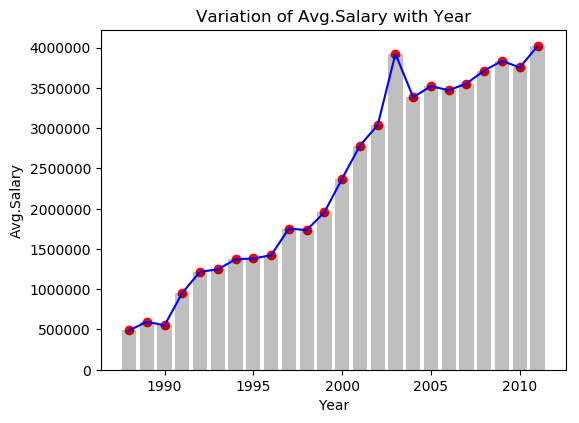

In [7]:
pitcher_salaries=[]
Year=[]
average_df=mlb_salaries[mlb_salaries['Position']=='Outfielder']
grouped_year=average_df.groupby('Year')
for year_count,df_year in grouped_year:
    Year.append(year_count)
    pitcher_salaries.append(df_year['Salary'].mean())
    
#plotting the curve    
fig,ax=plt.subplots(nrows=1,ncols=1,figsize=(6,4.5),dpi=100)
ax.scatter(Year,pitcher_salaries,color='red')
ax.plot(Year,pitcher_salaries,color='blue')
ax.bar(Year,pitcher_salaries,color='black',alpha=0.25)
ax.set_xlabel('Year')
ax.set_ylabel('Avg.Salary')
ax.set_title('Variation of Avg.Salary with Year')

#### 6) Plotting the annual variation of total  salaries of Pitchers  by Texas Rangers, Los Angeles Angels, Los Angeles Dodgers, Washington Nationals and New York Yankees :

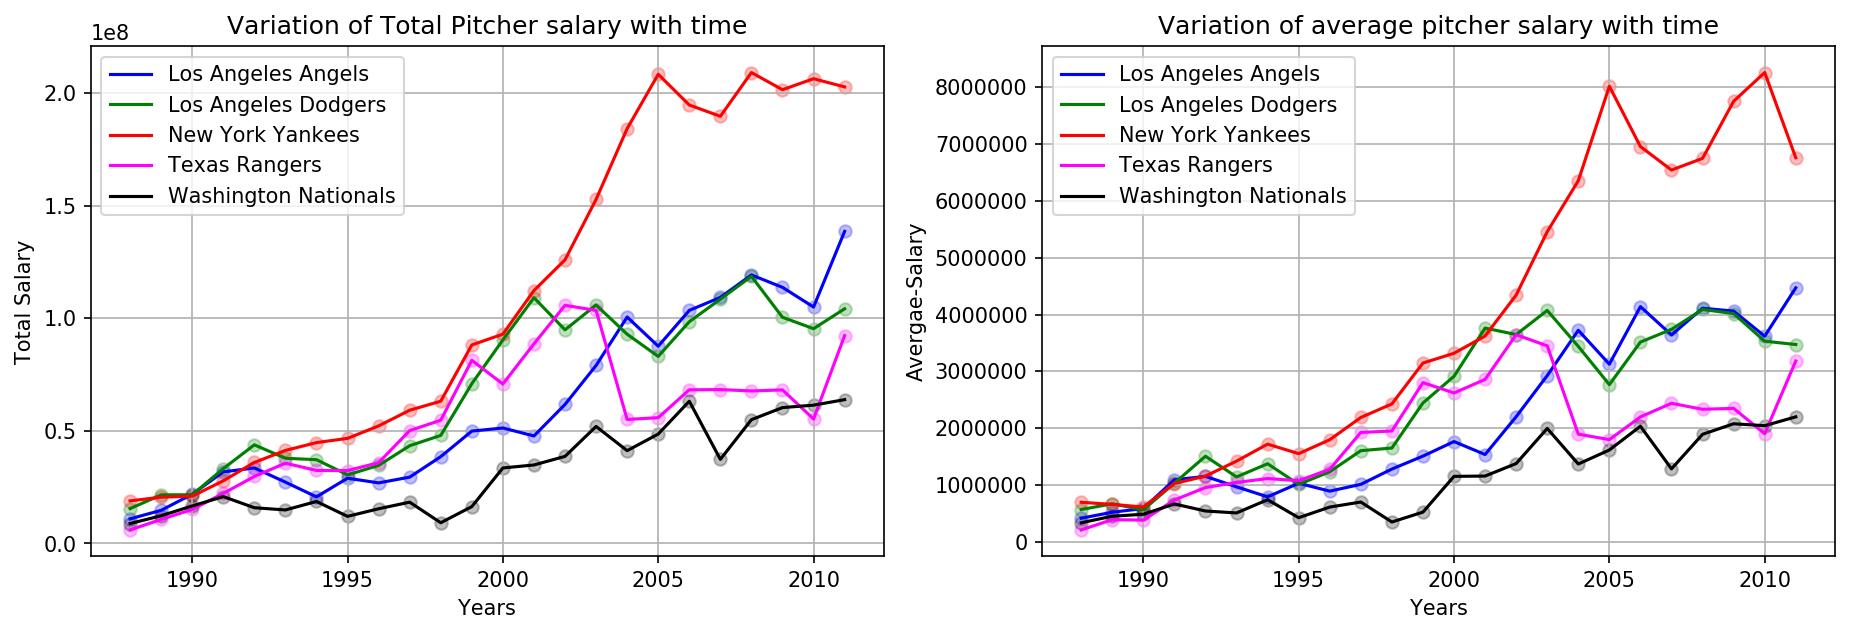

In [8]:

#code for depicting the variation of total salary of pitchers across the mentioned teams
team_list=['Texas Rangers','New York Yankees','Los Angeles Angels','Los Angeles Dodgers','Washington Nationals']
mlb_teams=mlb_salaries[mlb_salaries['Team'].isin(team_list)]
mlb_teams['Team'].value_counts()
salaries=[]
years=[]
teams=[]
grouped_team=mlb_teams.groupby('Team')
for team,df_team in grouped_team:
    total_salary=[]
    year_count=[]
    grouped_year=df_team.groupby('Year')
    for year,df_year in grouped_year:
        total_salary.append(df_year['Salary'].sum())
        year_count.append(year)
    salaries.append(total_salary)
    years.append(year_count)
    teams.append(team)
colors=['blue','green','red','magenta','black']
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(15,4.5),dpi=150)
for count in range(5):
    ax[0].plot(years[count],salaries[count],label=teams[count],color=colors[count],alpha=1)
    ax[0].scatter(years[count],salaries[count],color=colors[count],alpha=0.25)
    ax[0].grid()
    ax[0].legend()
    ax[0].set_xlabel('Years')
    ax[0].set_ylabel('Total Salary')
    ax[0].set_title('Variation of Total Pitcher salary with time')
    
#code for depicting the variation of average salary of pitchers across the mentioned teams
team_list=['Texas Rangers','New York Yankees','Los Angeles Angels','Los Angeles Dodgers','Washington Nationals']
mlb_teams=mlb_salaries[mlb_salaries['Team'].isin(team_list)]
mlb_teams['Team'].value_counts()
salaries1=[]
years1=[]
teams1=[]
grouped_team=mlb_teams.groupby('Team')
for team,df_team in grouped_team:
    avg_salary=[]
    year_count=[]
    grouped_year=df_team.groupby('Year')
    for year,df_year in grouped_year:
        avg_salary.append(df_year['Salary'].mean())
        year_count.append(year)
    salaries1.append(avg_salary)
    years1.append(year_count)
    teams1.append(team)
colors=['blue','green','red','magenta','black']
for count in range(5):
    ax[1].plot(years1[count],salaries1[count],label=teams1[count],color=colors[count],alpha=1)
    ax[1].scatter(years1[count],salaries1[count],color=colors[count],alpha=0.25)
    ax[1].grid()
    ax[1].legend()
    ax[1].set_xlabel('Years')
    ax[1].set_ylabel('Avergae-Salary')
    ax[1].set_title('Variation of average pitcher salary with time')

#### 7) Plotting the anual variation of avergae salaries of Pitcher, Catcher and Outfielder paid by New York Yankees :

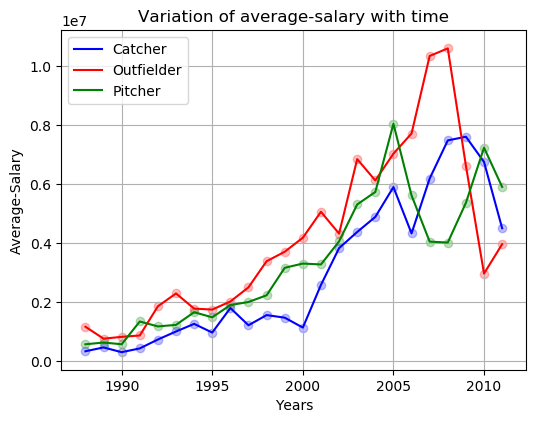

In [9]:
mlb_team=mlb_salaries[mlb_salaries['Team']=='New York Yankees']
position_list=['Pitcher','Outfielder','Catcher']
mlb_team=mlb_team[mlb_team['Position'].isin(position_list)]

grouped_position=mlb_team.groupby('Position')
annual_count=[]
average_salary=[]
positions=[]
for position,df_position in grouped_position:
    year_count=[]
    avg_salary=[]
    grouped_year=df_position.groupby('Year')
    for year,df_year in grouped_year:
        year_count.append(year)
        avg_salary.append(df_year['Salary'].mean())
    annual_count.append(year_count)
    average_salary.append(avg_salary)
    positions.append(position)
colors=['blue','red','green']
fig,ax=plt.subplots(nrows=1,ncols=1,figsize=(6,4.5),dpi=100)
for count in range(3):
    ax.plot(annual_count[count],average_salary[count],label=positions[count],color=colors[count],alpha=1)
    ax.scatter(annual_count[count],average_salary[count],color=colors[count],alpha=0.25)
    ax.grid()
    ax.legend()
    ax.set_xlabel('Years')
    ax.set_ylabel('Average-Salary')
    ax.set_title('Variation of average-salary with time')

#### 8) Expressing pitcher and outfielder salaries as proportion of total salaries paid by Los Angeles Angels for each year :

Text(0.5,1,'Variation of salaries of pitchers and outfielders as proportion of total annual salaries')

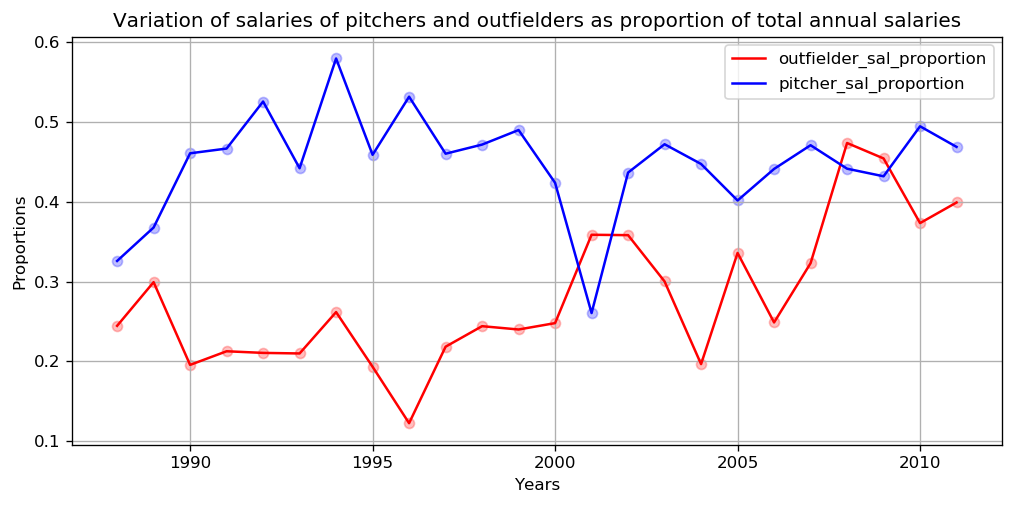

In [10]:
mlb_team1=mlb_salaries[mlb_salaries['Team']=='Los Angeles Angels']
grouped_year1=mlb_team1.groupby('Year')
total_salary=[]
annual_count=[]
pitcher_salary=[]
for year1,df_year1 in grouped_year1:
    total_salary.append(df_year1['Salary'].sum())
    annual_count.append(year1)
    
#for pitcher salaries:    
mlb_position1=mlb_team1[mlb_team1['Position']=='Pitcher']
pitcher_salary=[]
grouped_year2=mlb_position1.groupby('Year')
for year2,df_year2 in grouped_year2:
    pitcher_salary.append(df_year2['Salary'].sum())

#for outfielder salaries:
mlb_team2=mlb_salaries[mlb_salaries['Team']=='Los Angeles Angels']
outfielder_salary=[]
mlb_position2=mlb_team2[mlb_team2['Position']=='Outfielder']
grouped_year3=mlb_position2.groupby('Year')
for year3,df_year3 in grouped_year3:
    outfielder_salary.append(df_year3['Salary'].sum())
    
#creating a new dataframe:
new_df=pd.DataFrame(data={'Year':annual_count,'total_sal':total_salary,'pitcher_sal':pitcher_salary,'outfielder_sal':outfielder_salary})
new_df['outfielder_sal_proportion']=new_df['outfielder_sal']/new_df['total_sal']
new_df['pitcher_sal_proportion']=new_df['pitcher_sal']/new_df['total_sal']

#dropping the redundant columns:
new_df=new_df.drop(labels=['outfielder_sal','pitcher_sal','total_sal'],axis=1)

#plotting the curves of pitcher and outfielder salaries as proportions of total salaries wrt time:

fig,ax=plt.subplots(nrows=1,ncols=1,figsize=(10,4.5),dpi=120)

ax.plot(new_df['Year'],new_df['outfielder_sal_proportion'],label='outfielder_sal_proportion',color='red')
ax.plot(new_df['Year'],new_df['pitcher_sal_proportion'],label='pitcher_sal_proportion',color='blue')
ax.legend()

ax.scatter(new_df['Year'],new_df['outfielder_sal_proportion'],color='red',alpha=0.25)
ax.scatter(new_df['Year'],new_df['pitcher_sal_proportion'],color='blue',alpha=0.25)

ax.grid()
ax.set_xlabel('Years')
ax.set_ylabel('Proportions')
ax.set_title('Variation of salaries of pitchers and outfielders as proportion of total annual salaries')